Copyright 2019 Anthony Ng.

&emsp;

Licensed under the Apache License, Version 2.0 (the "License");

you may not use this file except in compliance with the License.

You may obtain a copy of the License at


&emsp;https://www.apache.org/licenses/LICENSE-2.0


Unless required by applicable law or agreed to in writing, software

distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and

limitations under the License.

## Binary Classification Example

In [0]:
import numpy as np

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


## Preparing the Training Data

Load [mnist](http://yann.lecun.com/exdb/mnist/) dataset as distributed with keras


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
tf.keras.backend.image_data_format()

'channels_last'

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
if tf.keras.backend.image_data_format() == 'channels_last':
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
y_train = np.where(y_train != 5, 0, 1)
# not digit 5, then y target convert to 0
# if it is digit 5, then y target is 1

In [0]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

## Network Architecture

In [0]:
batch_size = 128
num_classes = 1
epochs = 20

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])
model.summary()

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']) # Loss Function and Optimisers

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Measure the Performance of the NN

In [0]:
x_val = x_train[50000:]
x_train_1 = x_train[:50000]
y_val = y_train[50000:]
y_train_1 = y_train[:50000]

In [0]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 76us/sample - loss: 0.2585 - accuracy: 0.9070 - val_loss: 0.1996 - val_accuracy: 0.9128
Epoch 2/20
50000/50000 [==============================] - 2s 42us/sample - loss: 0.1747 - accuracy: 0.9293 - val_loss: 0.1538 - val_accuracy: 0.9448
Epoch 3/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1430 - accuracy: 0.9485 - val_loss: 0.1316 - val_accuracy: 0.9569
Epoch 4/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1255 - accuracy: 0.9572 - val_loss: 0.1183 - val_accuracy: 0.9620
Epoch 5/20
50000/50000 [==============================] - 2s 42us/sample - loss: 0.1138 - accuracy: 0.9622 - val_loss: 0.1090 - val_accuracy: 0.9666
Epoch 6/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1051 - accuracy: 0.9656 - val_loss: 0.1020 - val_accuracy: 0.9688
Epoch 7/20
50000/50000 [==============================] 

## Visualisation Performance

In [0]:
import matplotlib.pyplot as plt
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']

epochs = range(1, len(h.history['accuracy']) + 1)

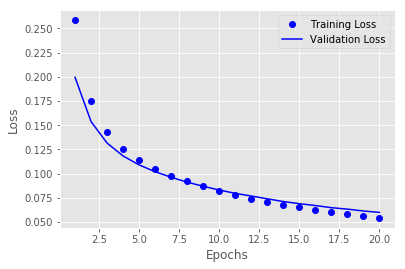

In [0]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

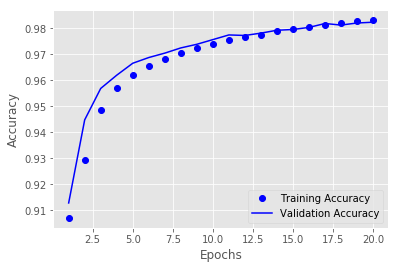

In [0]:
plt.clf()
acc_values = h.history['accuracy']
val_acc_values = h.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo', 
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***